In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import dateutil.parser

> First, I made a mistake naming the data set! **It's 2015 data, not 2014 data.** But yes, still use `311-2014.csv`. You can rename it.

# Importing and preparing your data

Import your data, but **only the first 200,000 rows**. You'll also want to change the index to be a datetime based on the **Created Date** column - you'll want to check if it's already a datetime, and parse it if not.

In [2]:
df = pd.read_csv("311-2015.csv", nrows=200000)

/usr/local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (8,17,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#total number of rows 
print("Total rows: {0}".format(len(df)))


Total rows: 200000


In [4]:
#Alternative way to do it
#df2 = df.ix[:200000]

In [6]:
print("Total rows: {0}".format(len(df))) #20000 data points+1 for columns name

Total rows: 200000


In [7]:
#you can see that df2 dataframe displays 20000 rows of data.
df.tail()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
199995,30804200,06/09/2015 11:11:56 AM,06/09/2015 11:38:39 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458,2971 WEBSTER AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.867659,-73.882990,"(40.86765943109168, -73.88299009268677)"
199996,30804335,06/09/2015 12:00:00 AM,06/10/2015 12:00:00 AM,HPD,Department of Housing Preservation and Develop...,GENERAL,COOKING GAS,RESIDENTIAL BUILDING,11368,40-56 JUNCTION BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.748051,-73.868768,"(40.74805092746579, -73.86876755648586)"
199997,30509208,04/29/2015 02:29:00 PM,04/23/2015 10:55:00 PM,DOT,Department of Transportation,Street Light Condition,Street Light Out,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
199998,30516417,04/30/2015 12:17:53 PM,04/30/2015 02:55:58 PM,NYPD,New York City Police Department,Traffic,Congestion/Gridlock,Street/Sidewalk,10017,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.755301,-73.975344,"(40.755300562504196, -73.97534387376678)"
199999,30804324,06/09/2015 12:48:25 PM,06/09/2015 12:48:42 PM,HRA,HRA Benefit Card Replacement,Benefit Card Replacement,Medicaid,NYC Street Address,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#time variables like "Create Date" and "Closed Date" are not considered datatime
df.info()
df.columns

In [117]:
def parse_date(str_date):    
    return dateutil.parser.parse(str_date)

parse_date("07/06/2015 10:58:27 AM")

datetime.datetime(2015, 7, 6, 10, 58, 27)

In [115]:
df['Created Date'].head(2)

Date
2015-07-06 10:58:27    07/06/2015 10:58:27 AM
2015-07-03 13:26:29    07/03/2015 01:26:29 PM
Name: Created Date, dtype: object

In [118]:
df['Date'] = df['Created Date'].apply(parse_date)
df.head(2)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Date
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-06 10:58:27,31015465,07/06/2015 10:58:27 AM,07/22/2015 01:07:20 AM,DCA,Department of Consumer Affairs,Consumer Complaint,Demand for Cash,NaN,11360,27-16 203 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.773540,-73.788237,"(40.773539552542, -73.78823697228408)",2015-07-06 10:58:27
2015-07-03 13:26:29,30997660,07/03/2015 01:26:29 PM,07/03/2015 02:08:20 PM,NYPD,New York City Police Department,Vending,In Prohibited Area,Residential Building/House,10019,200 CENTRAL PARK SOUTH,...,NaN,NaN,NaN,NaN,NaN,NaN,40.767021,-73.979448,"(40.76702142171206, -73.97944780718524)",2015-07-03 13:26:29


In [10]:
#print(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 54 columns):
Unique Key                        200000 non-null int64
Created Date                      200000 non-null object
Closed Date                       188913 non-null object
Agency                            200000 non-null object
Agency Name                       200000 non-null object
Complaint Type                    200000 non-null object
Descriptor                        198197 non-null object
Location Type                     179328 non-null object
Incident Zip                      181049 non-null object
Incident Address                  152173 non-null object
Street Name                       152152 non-null object
Cross Street 1                    108035 non-null object
Cross Street 2                    107583 non-null object
Intersection Street 1             24790 non-null object
Intersection Street 2             24530 non-null object
Address Type                      177

In [11]:
df.index = df['Date']

In [12]:
del df['Date']

In [13]:
df.head(10)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-06 10:58:27,31015465,07/06/2015 10:58:27 AM,07/22/2015 01:07:20 AM,DCA,Department of Consumer Affairs,Consumer Complaint,Demand for Cash,NaN,11360,27-16 203 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.773540,-73.788237,"(40.773539552542, -73.78823697228408)"
2015-07-03 13:26:29,30997660,07/03/2015 01:26:29 PM,07/03/2015 02:08:20 PM,NYPD,New York City Police Department,Vending,In Prohibited Area,Residential Building/House,10019,200 CENTRAL PARK SOUTH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.767021,-73.979448,"(40.76702142171206, -73.97944780718524)"
2015-11-09 03:55:09,31950223,11/09/2015 03:55:09 AM,11/09/2015 08:08:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10453,1993 GRAND AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.852671,-73.910608,"(40.85267061877697, -73.91060771362552)"
2015-07-03 02:18:32,31000038,07/03/2015 02:18:32 AM,07/03/2015 07:54:48 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11372,84-16 NORTHERN BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.755774,-73.883262,"(40.755773786469966, -73.88326243225418)"
2015-07-04 00:03:27,30995614,07/04/2015 12:03:27 AM,07/04/2015 03:33:09 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11216,1057 BERGEN STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.676175,-73.951269,"(40.67617516102934, -73.9512690004692)"
2015-07-09 00:00:00,31042454,07/09/2015 12:00:00 AM,07/20/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Standing Water,Other - Explain Below,Other,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-09 12:04:06,31043076,07/09/2015 12:04:06 PM,NaN,DPR,Department of Parks and Recreation,Root/Sewer/Sidewalk Condition,Trees and Sidewalks Program,Street,10469,3344 PEARSALL AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.873552,-73.851666,"(40.8735519638795, -73.85166629554799)"
2015-07-09 00:00:00,31037751,07/09/2015 12:00:00 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Standing Water,Puddle in Ground,3+ Family Apartment Building,10016,379 THIRD AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.741537,-73.981163,"(40.741536747969185, -73.98116258383294)"
2015-08-12 11:09:49,31298553,08/12/2015 11:09:49 AM,08/28/2015 01:06:41 AM,DCA,Department of Consumer Affairs,Consumer Complaint,Damaged/Defective Goods,NaN,11420,127-19 111 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.682584,-73.814056,"(40.68258427168297, -73.81405649149323)"


What was the **most popular type of complaint**, and how many times was it filed?

In [14]:
df['Complaint Type'].describe()
#top= mode. Frequency: 21779 cases

count               200000
unique                 180
top       Blocked Driveway
freq                 21779
Name: Complaint Type, dtype: object

In [15]:
#using mode function in complain type
df['Complaint Type'].mode()

0    Blocked Driveway
dtype: object

Make a horizontal bar graph of the **top 5 most frequent complaint types**.

In [18]:
complains = df.groupby('Complaint Type').count()

In [20]:
complains.sort('Unique Key', ascending=False).head(5)

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
Complaint Type,,,,,,,,,,,,,,,,,,,,,
Blocked Driveway,21779,21779,21711,21779,21779,21779,21771,21683,21410,21410,...,0,0,0,0,0,0,0,21672,21672,21672
Illegal Parking,19837,19837,19622,19837,19837,19837,19826,19552,16248,16248,...,0,0,0,0,0,0,0,19484,19484,19484
HEAT/HOT WATER,12408,12408,12341,12408,12408,12408,12408,12405,12408,12408,...,0,0,0,0,0,0,0,12405,12405,12405
Noise - Street/Sidewalk,11949,11949,11805,11949,11949,11949,11947,11783,9754,9754,...,0,0,0,0,0,0,0,11730,11730,11730
Noise - Commercial,9603,9603,9487,9603,9603,9603,9601,9478,8854,8854,...,0,0,0,0,0,0,0,9468,9468,9468


In [21]:
COM = complains.sort('Unique Key', ascending=False)

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [30]:
COM['Unique Key'].head(5)

Complaint Type
Blocked Driveway           21779
Illegal Parking            19837
HEAT/HOT WATER             12408
Noise - Street/Sidewalk    11949
Noise - Commercial          9603
Name: Unique Key, dtype: int64

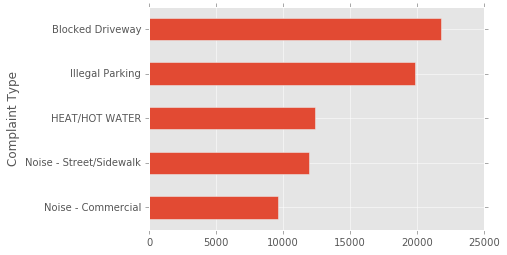

In [109]:
COM['Unique Key'].head(5).sort_values().plot.barh()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
COMG.plot.hist()

Which borough has the **most complaints per capita?** Since it's only 5 boroughs, you can do the math manually.

In [61]:
#Now NaNs are 0
df["Incident Zip"].fillna(0, inplace=True)


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-06 10:58:27,31015465,07/06/2015 10:58:27 AM,07/22/2015 01:07:20 AM,DCA,Department of Consumer Affairs,Consumer Complaint,Demand for Cash,NaN,11360,27-16 203 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.773540,-73.788237,"(40.773539552542, -73.78823697228408)"
2015-07-03 13:26:29,30997660,07/03/2015 01:26:29 PM,07/03/2015 02:08:20 PM,NYPD,New York City Police Department,Vending,In Prohibited Area,Residential Building/House,10019,200 CENTRAL PARK SOUTH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.767021,-73.979448,"(40.76702142171206, -73.97944780718524)"
2015-11-09 03:55:09,31950223,11/09/2015 03:55:09 AM,11/09/2015 08:08:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10453,1993 GRAND AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.852671,-73.910608,"(40.85267061877697, -73.91060771362552)"
2015-07-03 02:18:32,31000038,07/03/2015 02:18:32 AM,07/03/2015 07:54:48 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11372,84-16 NORTHERN BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.755774,-73.883262,"(40.755773786469966, -73.88326243225418)"
2015-07-04 00:03:27,30995614,07/04/2015 12:03:27 AM,07/04/2015 03:33:09 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11216,1057 BERGEN STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.676175,-73.951269,"(40.67617516102934, -73.9512690004692)"
2015-07-09 00:00:00,31042454,07/09/2015 12:00:00 AM,07/20/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Standing Water,Other - Explain Below,Other,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-09 12:04:06,31043076,07/09/2015 12:04:06 PM,NaN,DPR,Department of Parks and Recreation,Root/Sewer/Sidewalk Condition,Trees and Sidewalks Program,Street,10469,3344 PEARSALL AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.873552,-73.851666,"(40.8735519638795, -73.85166629554799)"
2015-07-09 00:00:00,31037751,07/09/2015 12:00:00 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Standing Water,Puddle in Ground,3+ Family Apartment Building,10016,379 THIRD AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.741537,-73.981163,"(40.741536747969185, -73.98116258383294)"
2015-08-12 11:09:49,31298553,08/12/2015 11:09:49 AM,08/28/2015 01:06:41 AM,DCA,Department of Consumer Affairs,Consumer Complaint,Damaged/Defective Goods,NaN,11420,127-19 111 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.682584,-73.814056,"(40.68258427168297, -73.81405649149323)"


In [92]:
complains = df['Borough'].value_counts()

BROOKLYN         57129
QUEENS           46824
MANHATTAN        42050
BRONX            29610
Unspecified      17000
STATEN ISLAND     7387
Name: Borough, dtype: int64

In [112]:
#brooklyn 2592000
#staten island 472621 
# 1419000
#Man 1626000
#queens 2296000

bcount = pd.DataFrame(df['Borough'].value_counts())
bcount['name'] = bcount.index
bcount

,Borough,name
BROOKLYN,57129,BROOKLYN
QUEENS,46824,QUEENS
MANHATTAN,42050,MANHATTAN
BRONX,29610,BRONX
Unspecified,17000,Unspecified
STATEN ISLAND,7387,STATEN ISLAND


In [113]:
#Merged in pandas need to be learn to solve this!

According to your selection of data, **how many cases were filed in March?** How about May?

In [97]:
March = df['2015-03']['Unique Key'].count()
May = df['2015-05']['Unique Key'].count()
print("March:", March)
print("May:", May)

March: 15025
May: 49715


I'd like to see all of the 311 complaints **called in on April 1st.**

> **Surprise!** We couldn't do this in class, but it was just a limitation of our data set

In [98]:
df['2015-04-01']['Unique Key'].count()

573

What was the most popular type of complaint on April 1st?

What were the **most popular three types of complaint** on April 1st

In [108]:
top1 = df['2015-04-01']['Complaint Type'].value_counts().head(1)
top3 = df['2015-04-01']['Complaint Type'].value_counts().head(3)
print("April#1:", top1)
print("----------------------")
print("April TOP3:", top3)

April#1: Illegal Parking    67
Name: Complaint Type, dtype: int64
----------------------
April TOP3: Illegal Parking     67
Street Condition    64
Blocked Driveway    58
Name: Complaint Type, dtype: int64


**What month has the most reports filed?** How many? Graph it.

In [119]:
df.index.month[:15]

array([ 7,  7, 11,  7,  7,  7,  7,  7,  8,  9,  9,  9,  9,  9,  4], dtype=int32)

In [121]:
df.groupby(by=df.index.month)['Unique Key'].count()

1      7094
2      8141
3     15025
4     20087
5     49715
6     14459
7     15047
8     12204
9     13679
10    24700
11    16476
12     3373
Name: Unique Key, dtype: int64

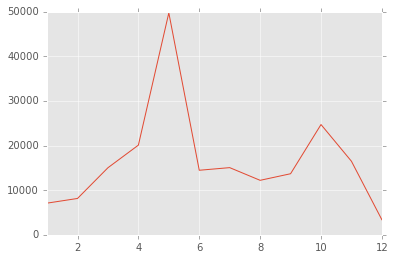

In [122]:
df.groupby(by=df.index.month)['Unique Key'].count().plot() #all months no matter what year

In [123]:
df.resample('M')['Unique Key'].count() #resample takes care of the month of this year.

Date
2015-01-31     7091
2015-02-28     8141
2015-03-31    15025
2015-04-30    20087
2015-05-31    49715
2015-06-30    14459
2015-07-31    15047
2015-08-31    12204
2015-09-30    13679
2015-10-31    24700
2015-11-30    16476
2015-12-31     3373
2016-01-31        3
Freq: M, Name: Unique Key, dtype: int64

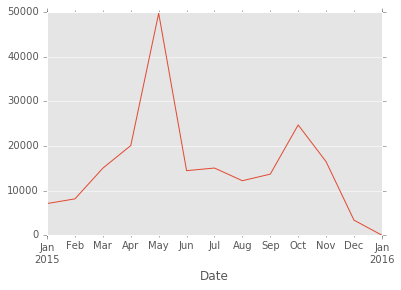

In [124]:
df.resample('M')['Unique Key'].count().plot()

**What week of the year has the most reports filed?** How many? Graph the weekly complaints.

In [125]:
df.index.week

array([28, 27, 46, ..., 18, 18, 24], dtype=int32)

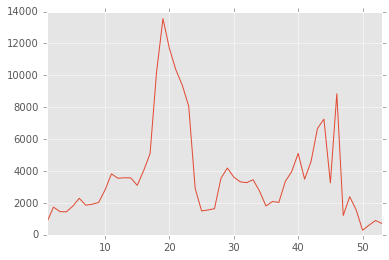

In [126]:
df.groupby(by=df.index.week)['Unique Key'].count().plot()

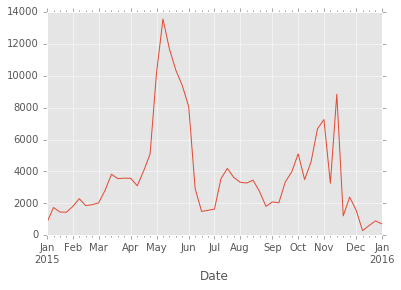

In [127]:
df.resample('W')['Unique Key'].count().plot()

Noise complaints are a big deal. Use `.str.contains` to select noise complaints, and make an chart of when they show up annually. **Then** make a chart about when they show up every day (cyclic).

In [130]:
noise = df['Complaint Type'].str.contains("Noise")
noise_df = df[noise]
noise_df.head(2)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Date
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-03 02:18:32,31000038,07/03/2015 02:18:32 AM,07/03/2015 07:54:48 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11372,84-16 NORTHERN BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,40.755774,-73.883262,"(40.755773786469966, -73.88326243225418)",2015-07-03 02:18:32
2015-07-04 00:03:27,30995614,07/04/2015 12:03:27 AM,07/04/2015 03:33:09 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11216,1057 BERGEN STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.676175,-73.951269,"(40.67617516102934, -73.9512690004692)",2015-07-04 00:03:27


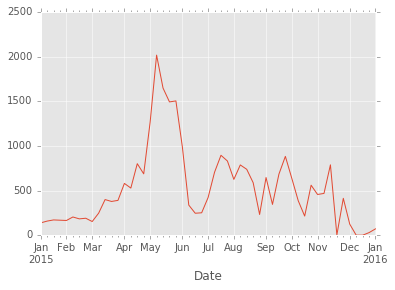

In [133]:
noise_df.resample('W')['Unique Key'].count().plot()

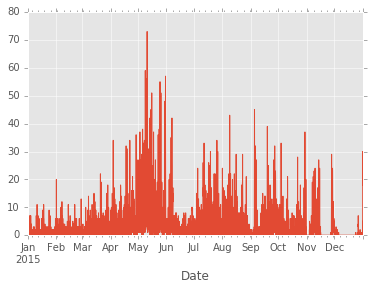

In [134]:
noise_df.resample('H')['Unique Key'].count().plot() #resample emember what day, month, hour and year. Waht we want is
#by day only.

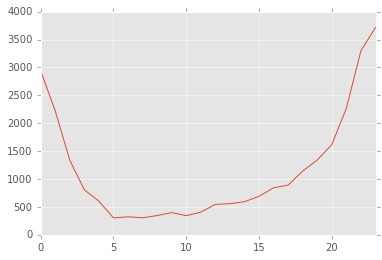

In [135]:
noise_df.groupby(by=noise_df.index.hour)['Unique Key'].count().plot()

**Which were the top five days of the year for filing complaints?** How many on each of those days? Graph it.

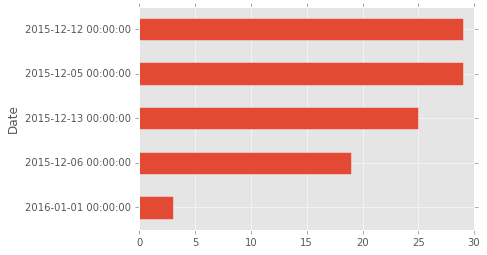

In [140]:
df['Unique Key'].resample('D').count().sort_values(ascending=True).head(5).plot.barh()

**What hour of the day are the most complaints?** Graph a day of complaints.

In [ ]:
df.groupby()

One of the hours has an odd number of complaints. What are the most common complaints at that hour, and what are the most common complaints the hour before and after?

In [152]:
midnigth_df = df[df.index.hour == 0]

In [155]:
midnigth_df.head(2)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Date
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-04 00:03:27,30995614,07/04/2015 12:03:27 AM,07/04/2015 03:33:09 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11216,1057 BERGEN STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.676175,-73.951269,"(40.67617516102934, -73.9512690004692)",2015-07-04 00:03:27
2015-07-09 00:00:00,31042454,07/09/2015 12:00:00 AM,07/20/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Standing Water,Other - Explain Below,Other,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-07-09 00:00:00


So odd. What's the **per-minute breakdown** of complaints between 12am and 1am? You don't need to include 1am.

In [ ]:
midnigth_df.groupby(by=midnigth_df.index.minute)['Unique Key'].

Looks like midnight is a little bit of an outlier. Why might that be? Take the 5 most common agencies and graph the times they file reports at (all day, not just midnight).

Graph those same agencies on an annual basis - make it **weekly**. When do people like to complain? When does the NYPD have an odd number of complaints?

Maybe the NYPD deals with different issues at different times? Check the most popular complaints in July and August vs the month of May. Also check the most common complaints for the Housing Preservation Bureau (HPD) in winter vs. summer.

In [157]:
df[df['Agency'] == 'NYPD']['2015-07':'2015-08']['Complaint Type'].value_counts().head(5)

Illegal Parking            3444
Blocked Driveway           3258
Noise - Street/Sidewalk    3165
Noise - Commercial         1201
Noise - Vehicle             942
Name: Complaint Type, dtype: int64

In [159]:
df[df['Agency'] == 'NYPD']['2015-06':'2015-08']['Complaint Type'].value_counts().head(5)

Illegal Parking            4769
Blocked Driveway           4646
Noise - Street/Sidewalk    3977
Noise - Commercial         1801
Derelict Vehicle           1260
Name: Complaint Type, dtype: int64

In [158]:
df[df['Agency'] == 'HPD']['2015-07':'2015-08']['Complaint Type'].value_counts().head(5)

UNSANITARY CONDITION    193
PAINT/PLASTER           130
PLUMBING                 96
WATER LEAK               73
ELECTRIC                 65
Name: Complaint Type, dtype: int64

In [162]:
df[df['Agency'] == 'HPD']['2015-01':'2015-02']['Complaint Type'].value_counts().head(5)

UNSANITARY CONDITION    8
GENERAL                 3
PAINT/PLASTER           3
WATER LEAK              2
APPLIANCE               2
Name: Complaint Type, dtype: int64

In [164]:
df[df['Agency'] == 'HPD']['2015-05':'2015-08']['Complaint Type'].value_counts()

HEAT/HOT WATER            4200
HPD Literature Request    2424
UNSANITARY CONDITION      2063
PAINT/PLASTER             2015
PLUMBING                  1555
DOOR/WINDOW               1051
GENERAL                    978
WATER LEAK                 925
ELECTRIC                   917
FLOORING/STAIRS            714
APPLIANCE                  294
SAFETY                     292
OUTSIDE BUILDING            51
ELEVATOR                    36
Name: Complaint Type, dtype: int64